# AirBnB Predictive Model
## Data Exploration and Cleaning

In [391]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_profiling

from ast import literal_eval

In [290]:
# pandas settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [291]:
# create df from original .csv of listings from Ireland AirBnB data
listings = pd.read_csv('listings.csv')
# print out the shape of the df
print(listings.shape)

(28850, 111)


In [292]:
# create a list to drop redundent columns and others based on domain knowledge
columns_to_keep = [
    'id',
    'name',
    'summary',
    'space',
    'description',
    'experiences_offered',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_neighbourhood',
    'host_listings_count',
    'host_total_listings_count',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'street',
    'neighbourhood',
    'city',
    'state',
    'zipcode',
    'market',
    'smart_location',
    'country_code',
    'country',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'square_feet',
    'price',
    'weekly_price',
    'monthly_price',
    'security_deposit',
    'cleaning_fee',
    'guests_included',
    'extra_people',
    'minimum_nights',
    'maximum_nights',
    'calendar_updated',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'first_review',
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'requires_license',
    'license',
    'jurisdiction_names',
    'instant_bookable',
    'is_business_travel_ready',
    'cancellation_policy',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month'
]

In [293]:
# drop columns from list above
listings = listings[columns_to_keep]
# print out new df shape after columns where dropped
print(listings.shape)

(28850, 85)


In [294]:
# print out first 5 rows
listings.head()

id                                               name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                             access                                        interaction                                        house_rules host_name  host_since            host_location                                         host_about  host_response_time host_response_rate  host_acceptance_rate host_is_superhost          host_neighbourhood  host_listings_count  host_total_listings_count                                 host_verifications host_has_profile_pic host_identity_verified                              street               neighbourhood        city          state   zipcode  market       smart_location country_code  country  latitude  longitude property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities  square_feet    price weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license license  jurisdiction_names instant_bookable is_business_travel_ready          cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0  20436982  Close to city centre, situated in charming vil...  A modern duplex house, recently refurbished, w...  This is a comfortable, warm home which has eve...  A modern duplex house, recently refurbished, w...                none  A lovely quaint village, with a relaxed friend...                                                NaN  There is a direct bus route to city centre, th...       Parking, Washing Machine, Kitchen, Wi-Fi, TV        Available in person, or via phone and email                                                NaN     Laura  2014-04-29  Dublin, Dublin, Ireland                                                NaN                 NaN                NaN                   NaN                 f  Phoenix Park and Surrounds                  1.0                        1.0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t                      t      Dublin, County Dublin, Ireland  Phoenix Park and Surrounds      Dublin  County Dublin       NaN  Dublin      Dublin, Ireland           IE  Ireland  53.34940   -6.34664         House  Entire home/apt             2        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Wifi,Kitchen,"Free parking on p...          NaN   $90.00          NaN           NaN              NaN       $20.00                2       $30.00               1            1125    16 months ago                t                0                0                0                 0                 11                      0   2017-08-22  2018-09-18                 100.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f     NaN                 NaN                f                        f                     flexible                             f                                f                               1                                            1                                  

In [295]:
# look at basic descriptive stats for the columns kept
listings.describe()

id  host_acceptance_rate  host_listings_count  host_total_listings_count      latitude     longitude  accommodates    bathrooms      bedrooms          beds   square_feet  guests_included  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  jurisdiction_names  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
count  2.885000e+04                   0.0         28806.000000               28806.000000  28850.000000  28850.000000  28850.000000  28827.00000  28837.000000  28802.000000    119.000000     28850.000000    28850.000000    28850.000000     28850.000000     28850.000000     28850.000000      28850.000000       28850.000000           28850.000000          24813.000000            24800.000000               24803.000000           24790.000000                 24802.000000            24793.000000         24790.000000                 0.0                    28850.000000                                 28850.000000                                  28850.000000                                 28850.000000       25104.000000
mean   2.255376e+07                   NaN             7.673957                   7.673957     53.129477     -7.784263      4.050919      1.57212      1.892256      2.587980    786.478992         1.663813        2.832374      616.707106        13.571993        28.162392        45.413276        165.542184          37.898440              14.860069             95.228550                9.747661                   9.588356               9.833360                     9.836021                9.700117             9.520411                 NaN                        4.723605                                     3.402704                                      1.165581                                     0.036499           1.893729
std    1.066242e+07                   NaN            49.794870                  49.794870      0.801081      1.424401      2.728778      1.05004      1.329742      2.258614   1536.494270         1.543081       12.827921      545.044153        12.377116        23.821179        36.398757        138.158974          62.551266              22.140080              6.904279                0.657196                   0.818875               0.557646                     0.552771                0.612319             0.779833                 NaN                       12.631900                                    12.629885                                      2.098679                                     0.454165           2.109219
min    1.153200e+04                   NaN             0.000000                   0.000000     51.431330    -10.539890      1.000000      0.00000      0.000000      0.000000      0.000000         1.000000        1.000000        1.000000         0.000000         0.000000         0.000000          0.000000           0.000000               0.000000             20.000000                2.000000                   2.000000               2.000000                     2.000000                2.000000             2.000000                 NaN                        1.000000                                     0.000000                                      0.000000                                     0.000000           0.010000
25%    1.457051e+07                   NaN             1.000000                   1.000000     52.622320     -9.089517      2.000000      1.00000      1.000000      1.000000      0.000000         1.000000        1.000000       21.000000         0.000000         0.000000         0.000000         17.000000           3.000000               1.000000             93.000000               10.000000     

In [296]:
# look at columns with null values, percent null is shown
listings.isnull().sum().sort_values(ascending=False) * 100 / len(listings)

host_acceptance_rate                            100.000000
jurisdiction_names                              100.000000
square_feet                                      99.587522
license                                          99.473137
monthly_price                                    95.511265
weekly_price                                     92.284229
neighbourhood                                    71.566724
host_neighbourhood                               70.218371
notes                                            56.506066
zipcode                                          53.584055
host_about                                       50.117851
house_rules                                      48.592721
security_deposit                                 43.171577
access                                           43.133449
interaction                                      39.001733
transit                                          38.027730
neighborhood_overview                            36.2183

In [297]:
# drop more columns based on percentage of null values
listings.drop(columns=[
    'host_acceptance_rate',
    'jurisdiction_names',
    'square_feet',
    'license',
    'monthly_price',
    'weekly_price',
    'neighbourhood',
    'host_neighbourhood',
    'notes',
    'zipcode',
    'host_about',
    'house_rules'
], inplace=True)

In [298]:
# print out new shape of df
print(listings.shape)

(28850, 73)


In [299]:
# use pandas profile report to further examine data
profile = pandas_profiling.ProfileReport(listings)
# print report
profile

C:\Users\andre\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 22).')
  correlation_name=correlation_name, error=error


In [300]:
# drop more columns after looking at profile report
listings.drop(columns=[
    'access',
    'availability_60',
    'availability_90',
    'calculated_host_listings_count_entire_homes',
    'country',
    'country_code',
    'has_availability',
    'host_total_listings_count',
    'is_business_travel_ready',
    'requires_license',
    'id',
    'name',
    'summary',
    'space',
    'description',
    'experiences_offered',
    'neighborhood_overview',
    'interaction',
    'host_location',
    'street',
    'city',
    'state',
    'smart_location',
    'amenities',
    'calendar_updated',
    'number_of_reviews_ltm',
    'first_review',
    'last_review',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'bed_type',
    'host_has_profile_pic',
    'host_name',
    'transit'
], inplace=True)

In [301]:
# print out new shape
print(listings.shape)

(28850, 40)


## change t / f to 1 / 0
columns:

~~'host_is_superhost'~~

~~'host_identity_verified'~~

~~'instant_bookable'~~


## remove $ and make sure type is int or float
columns:

~~'security_deposit'~~

~~'price'~~

~~'cleaning_fee'~~

~~'extra_people'~~

## remove % and make sure type is float
column:

~~'host_response_rate'~~


## check and fix outliers
columns:

'accommodates'

'bathrooms'

'bedrooms'

'beds'

'calculated_host_listing_count_private_rooms'

'maximum_nights'

'minimum_nights'

'reviews_per_month'

## DROP columns that have almost all 1 value and very high cardinality
Columns:

~~'bed_type'~~

~~'Calculated_host_listing_count_shared_rooms'~~

~~'host_has_profile_pic'~~

~~'host_name'~~

## functions to clean up columns

In [302]:
# many columns contain t/f for true and false, changed these to 1's and 0's

def replace_t_f(df, cols):
    """
    replace t/f with 1/0 for each col provided in the df
    df: dataframe
    cols: list of columns
    return: new updated dataframe with 1/0 instead of t/f
    """
    
    df = df.copy()
    
    for col in cols:
        df[col] = df[col].replace({'t': 1, 'f': 0})
        
    return df

In [303]:
# numerical columns have '$', ',' and '%' making they the wrong type
# remove text symbols from numerical columns and make sure they are the right type

def remove_symbols_sing(df, cols):
    """
    remove '$', ',' and '%' and make sure value is a float
    df: dataframe
    cols: list of columns
    return: new updated dataframe with '$' removed
    """
    
    df = df.copy()
    
    for col in cols:
        df[col] = df[col].str.replace('$', '')
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].str.replace('%', '')
        df[col] = df[col].apply(pd.to_numeric)
        
    return df

In [304]:
# columns to change t/f to 1/0
t_f_cols = [
    'host_is_superhost',
    'host_identity_verified',
    'instant_bookable'
]

In [305]:
# columns that need to have symbols removed and changed to numerical
symbol_cols = [
    'security_deposit',
    'price',
    'cleaning_fee',
    'extra_people',
    'host_response_rate'
]

In [306]:
# replace t/f
listings = replace_t_f(listings, t_f_cols)

In [307]:
# remove symbols
listings = remove_symbols_sing(listings, symbol_cols)

In [308]:
listings.shape

(28850, 40)

## look at columns that might have outliers and data errors
columns:

~~'accommodates'~~

~~'bathrooms'~~

~~'bedrooms'~~

~~'beds'~~

~~'calculated_host_listing_count_private_rooms'~~

~~'maximum_nights'~~

~~'minimum_nights'~~

~~'reviews_per_month'~~

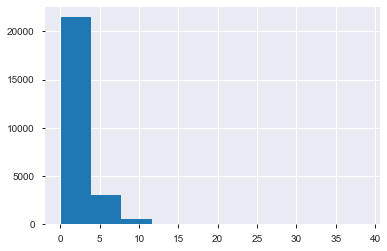

In [309]:
listings['reviews_per_month'].hist()

In [310]:
# clip outliers from dataframe
listings = listings[listings['calculated_host_listings_count_private_rooms'] < 7]
listings = listings[listings['accommodates'] < 11]
listings = listings[listings['bathrooms'] < 4.5]
listings = listings[listings['bedrooms'] < 6]
listings = listings[listings['beds'] < 8]
listings = listings[listings['maximum_nights'] < 1126]
listings = listings[listings['minimum_nights'] < 8]
listings = listings[listings['reviews_per_month'] < 11]

## Explore and handle null values

In [370]:
# look at remaining columns and null values
listings.isnull().sum().sort_values(ascending=False) * 100 / len(listings)

reviews_per_month                               0.0
longitude                                       0.0
price                                           0.0
beds                                            0.0
bedrooms                                        0.0
bathrooms                                       0.0
accommodates                                    0.0
room_type                                       0.0
property_type                                   0.0
latitude                                        0.0
cleaning_fee                                    0.0
market                                          0.0
host_identity_verified                          0.0
host_verifications                              0.0
host_listings_count                             0.0
host_is_superhost                               0.0
host_response_rate                              0.0
host_response_time                              0.0
security_deposit                                0.0
guests_inclu

In [312]:
# about 44 rows with NaNs accross multiple columns, drop those rows
listings = listings[pd.notnull(listings['host_is_superhost'])]
# print out new shape
print(listings.shape)

(22769, 40)


## Columns to inspect null values
columns:

~~security_deposit~~

~~transit~~ --> dropped due to time constraints, nlp potential if more time was available

~~cleaning_fee~~

~~host_response_rate~~

~~host_response_time~~


**DROP --> less than 2% NaNs so not much loss by dropping**

review_scores_value

review_scores_checkin  

review_scores_location 

review_scores_accuracy 

review_scores_communication  

review_scores_cleanliness

review_scores_rating

market 

In [358]:
listings['security_deposit'] = listings['security_deposit'].fillna(0)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(20)
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mean())
listings['host_response_time'] = listings['host_response_time'].fillna("within a day")

In [339]:
listings = listings[listings['security_deposit'] < 550]
listings = listings[listings['cleaning_fee'] < 110]

In [368]:
listings = listings.dropna()

In [406]:
listings.shape

(22126, 39)

In [379]:
listings['host_since'] = listings['host_since'].apply(pd.to_datetime)

In [383]:
listings['years_as_host'] = (2019) - (listings['host_since'].dt.year)

In [390]:
listings['host_verifications'][0]

"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']"

In [401]:
listings.loc[:,'num_host_verifications'] = listings.loc[:,'host_verifications'].apply(lambda x: len(literal_eval(x)))

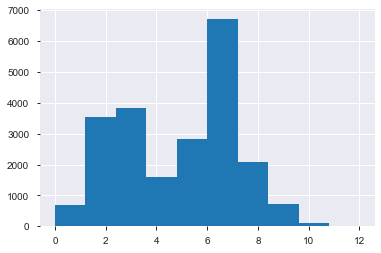

In [404]:
listings['num_host_verifications'].hist()

In [403]:
listings.drop(columns=['host_since', 'host_verifications'], inplace=True)

In [405]:
listings.to_csv('listings_cleaned.csv')